<a href="https://colab.research.google.com/github/Khushbupatel333/Bike1_Sharing_Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Regression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    
Bike Sharing Demand Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **GitHub Link**

https://github.com/Khushbupatel333/Bike1_Sharing_Prediction

# **Problem Statement**


Nowadays Rental bikes are introduced in many urban cities for the improvement of mobile comfort.Itbis important to make rental bikes avaialbel to the public at the right time as it makes watate of time.Eventyally providing a city with supply of rental bikes become a major concern.

The main objective is to predict the bike count required at each hour for supply of rental bikes.

The dataset contains information (Temperature,Humidity, Windspeed, dewpoint, visibility, solar radiation, snowfall, rainfall) the number of bike rented per hour.

**Data Description :-** The dataset contain information (Tempretarure,Humidity,Visibility,Dewpoint,snowfall,Rainfall),the number of rented bikes per hour and date information.

**Attribute Information :-**

Date : year-month-day

Rented Bike Count: count of bike rented at each hour

Hour: Hour of the day

Temperature: Temperature in celcius

Humidity: %

Windspeed: m/s

Visibility: 10m

Dew Point temperature: Celcius

Solar radiation:MJ/m2

Rainfall:mm

Snowfall: cm

Seasons:Winter,summer,spring,Autumn

Holiday: Holiday/no Holiday

Functioning Day: Nofunct(NonFuctional Hour),Fun(Functional Hour)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import math

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
encoding='latin1'
file_path='/content/drive/My Drive/Colab Notebooks 1/BikeSharing.csv'

dataset=pd.read_csv(file_path,encoding=encoding)
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset First View

In [4]:
# Dataset First Look

dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

dataset.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

print(dataset.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [9]:
# Dataset Columns

dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe

dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description

Date :The date of the day ,during 365 days from 01/12/2017 to 30/11/2018 formatting in DD/MM/YYYY type : str,we need to convert in datetime.

Rented_bike_count : Number of rented bike per hour which is dependent variable and we need to predict that type:str

Hour : The hour of the day starting from 0-23 it is in a digital time format type:int,we need to convert in category data type.

Temperature (°C) : Temperature in celcius type:float

Humidity (%) : Humidity in the air type:int

Wind_speed(m/s) : speed of the wind m/s type:float

Visiblity (10m) : visiblity in m,type:int

Dew_point(°C) : Temprature of beginning of day type:float

Solar_radiation(MJ/m2) : sun contribution type:float

Rainfall(mm) : Amount of raining  in mm type:float

Snowfall (cm) : Amount of snowing in cm type:float

Season : Season of the year type:str,there are only four seasons

Holiday : If the day is holiday  period or not type:str

Functioning_day : If the day is functioning day or not type:str

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for i in dataset.columns.tolist():
 print('Number of unique values:',dataset[i].nunique())

Number of unique values: 365
Number of unique values: 2166
Number of unique values: 24
Number of unique values: 546
Number of unique values: 90
Number of unique values: 65
Number of unique values: 1789
Number of unique values: 556
Number of unique values: 345
Number of unique values: 61
Number of unique values: 51
Number of unique values: 4
Number of unique values: 2
Number of unique values: 2


**This dataset contains 8760 lines and 14 columns.**

**In a day we have 24 hours  and we have 365 days a year so 365*24=8760,whcih represent the number of lines in dataset.**

###Breaking Date column

**Splitting Date column which is in string format int year,month and day as a category datatype**

In [12]:

# Create copy of data to new data

df=dataset.copy()

#Print all the unique values from dataset
print(df.nunique())

#Removing Duplicate values
duplicate=len(df[df.duplicated()])
print("Number of duplicate values:",duplicate)


#Count missing values in each column
print(df.isnull().sum())
#print(df)

#All columns in the data have names with symbols so we rename the names of columns
df=df.rename(columns={'Rented Bike Count':'Rented_bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10cm)':'Visiblity','Dew point temperature(°C)':'Dew_point','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})
df.head()


#Breaking the date column
#Splitting date column because this is in string format as year,month ,day.

#Changing the date column into categories

df['Date']=df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day_name()


#Create new column called Weekends and  dropping columns Date,day and year

df['Weekends']=df['day'].apply(lambda x:1 if x=='Saturday' or x=='Sunday' else 0)
df=df.drop(columns=['Date','day','year'],axis=1)


df.head()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64
Number of duplicate values: 0
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility (10m),Dew_point,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,Weekends
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [13]:
#Counting the values
print(df['Functioning_Day'].value_counts())
print(df['Weekends'].value_counts())

Yes    8465
No      295
Name: Functioning_Day, dtype: int64
0    6264
1    2496
Name: Weekends, dtype: int64


**1. So we convert the date column into 3 categories year,month and day**

**2.The year column basically contain from 2017 december to 2018 november i.e. one year we don't need the year column so we dropped it.**

**3.The other columns day it contain the each day pof the month ,so we don't need the month but we need the data about ,if a day is weekday so we convrt it into this format and dropped it.**

## ***4. Exploratory Data Analysis***

###Univariate Analysis

**The key Objective of Univariate Data Analysis is to simply describe the data to find pattern within the data.**

**we analyse our dependent variable,A dependent variable is variable whosevalue will change depending on the value of another**

**Our dependent variable is 'Rented_bike_count'so we need to analyse this column with other columns by using some plots. first we analyse category data type the we go for numerical data types.**



**Analysis of Categorical data**

1. Month
2. Weekends
3. Hour
4. Functioning_day
5. Season
6. Holiday

In [14]:
#categorical columns
cat_col=['Hour','month','Seasons','Holiday','Functioning_Day','Weekends']

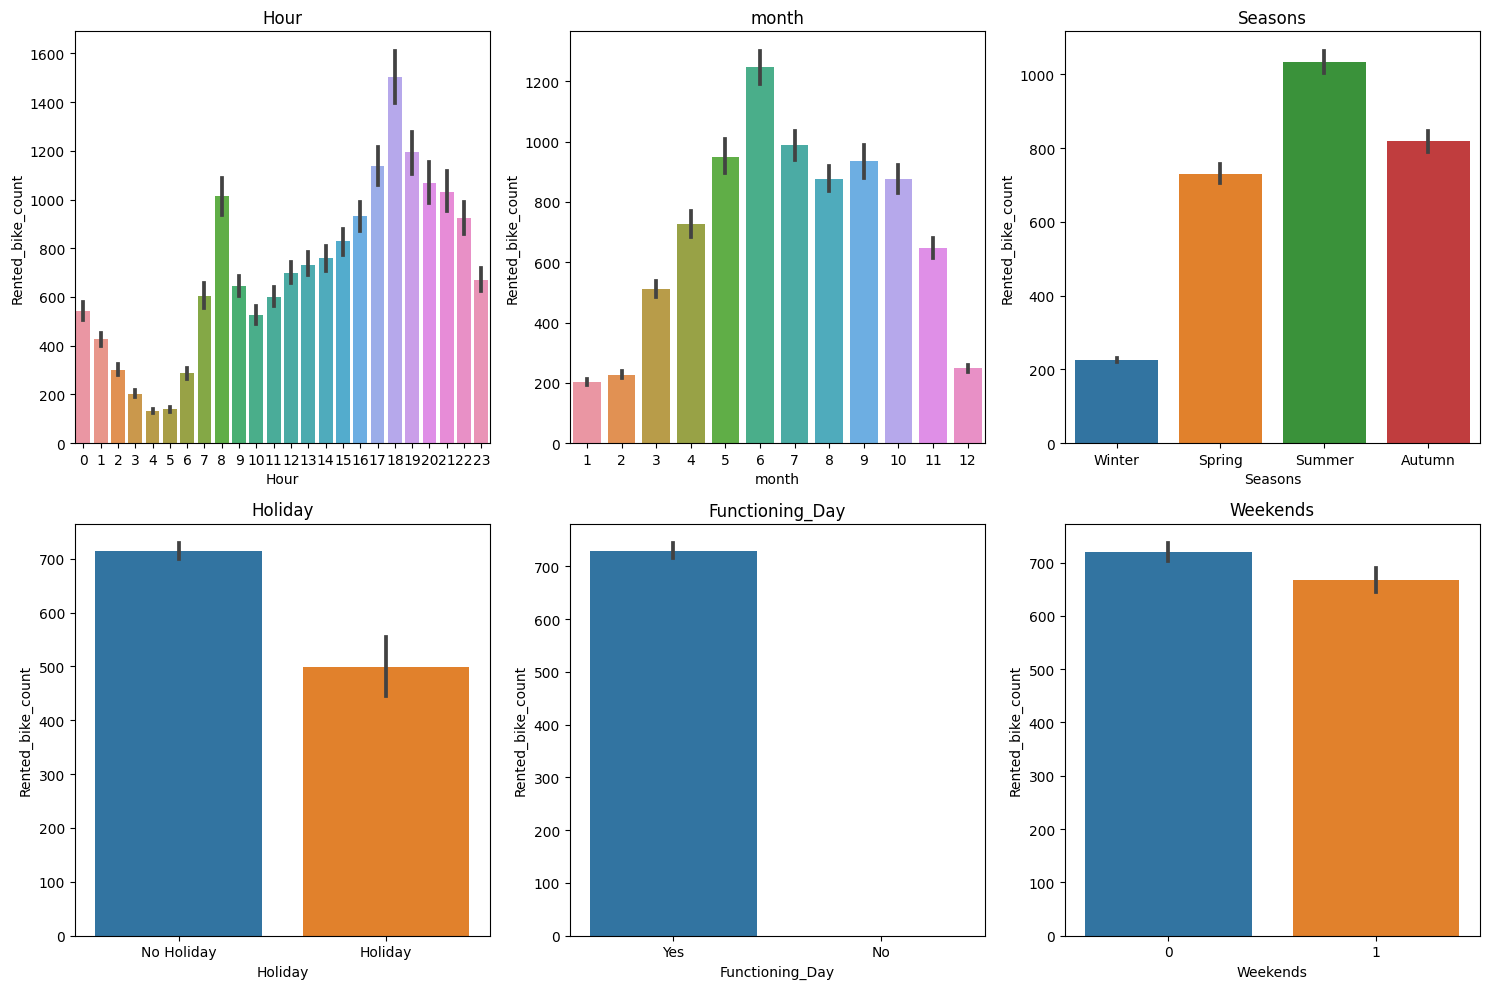

In [15]:
#Bar plots for Categorical features and Rented bike count
plt.figure(figsize=(15,10))
for n,col in enumerate(cat_col):
 plt.subplot(2,3,n+1)
 plt.title(col)
 sns.barplot(data=df,x=col,y='Rented_bike_count');
 plt.tight_layout();

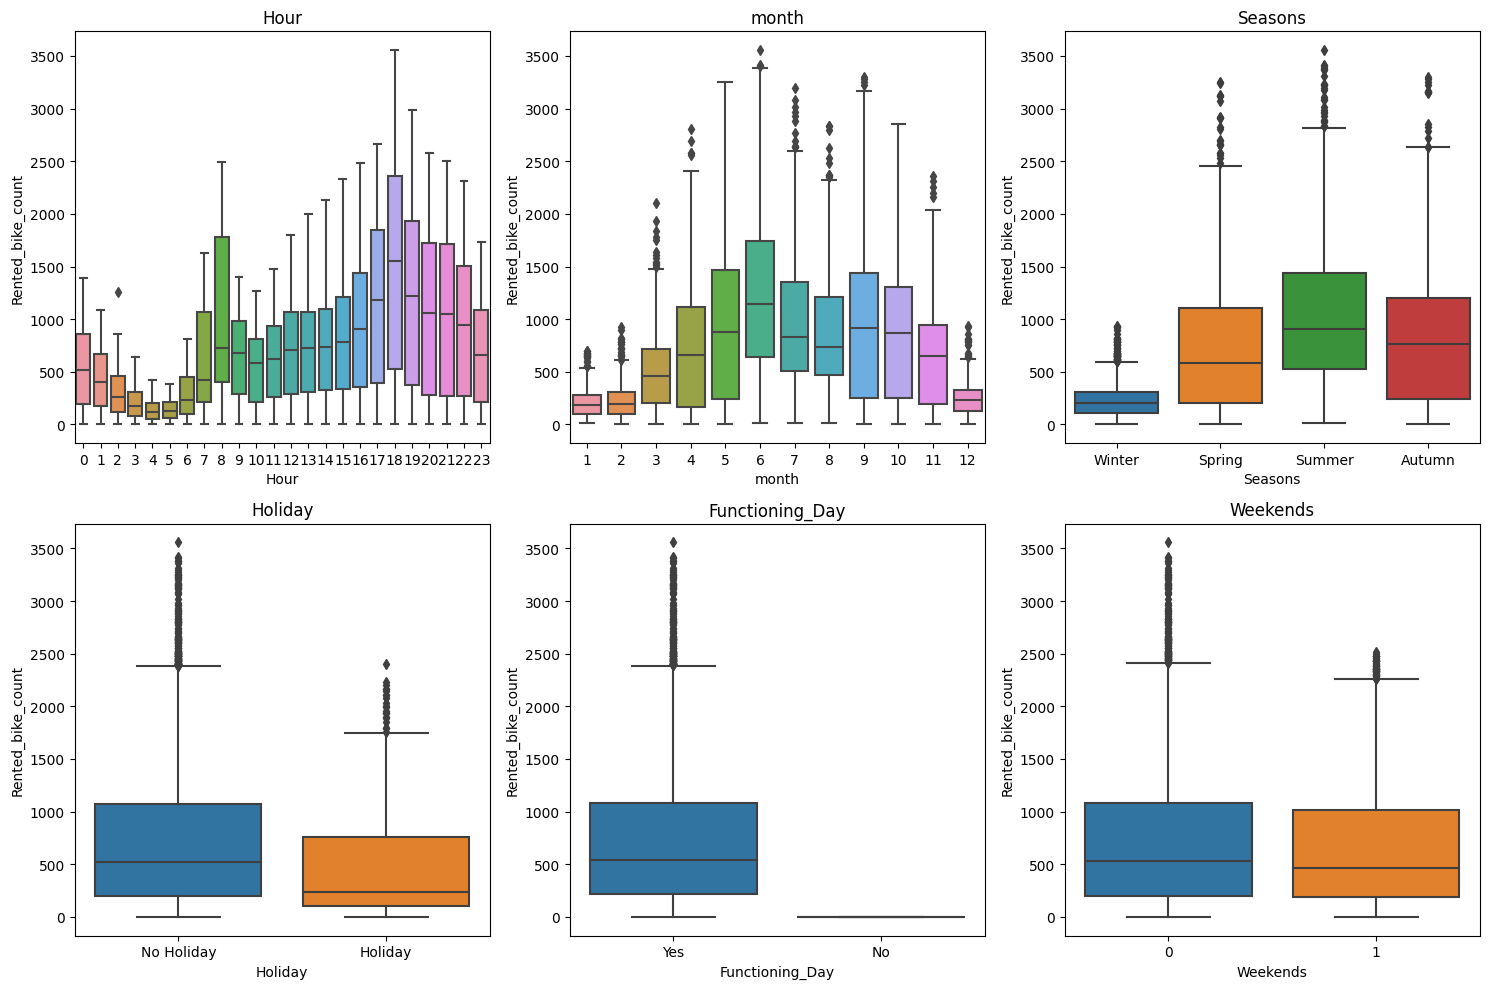

In [16]:
#Getting boxplots for categorical features
plt.figure(figsize=(15,10))
for n,col in enumerate(cat_col):
 plt.subplot(2,3,n+1)
 plt.title(col)
 sns.boxplot(data=df,x=col,y='Rented_bike_count');
 plt.tight_layout();




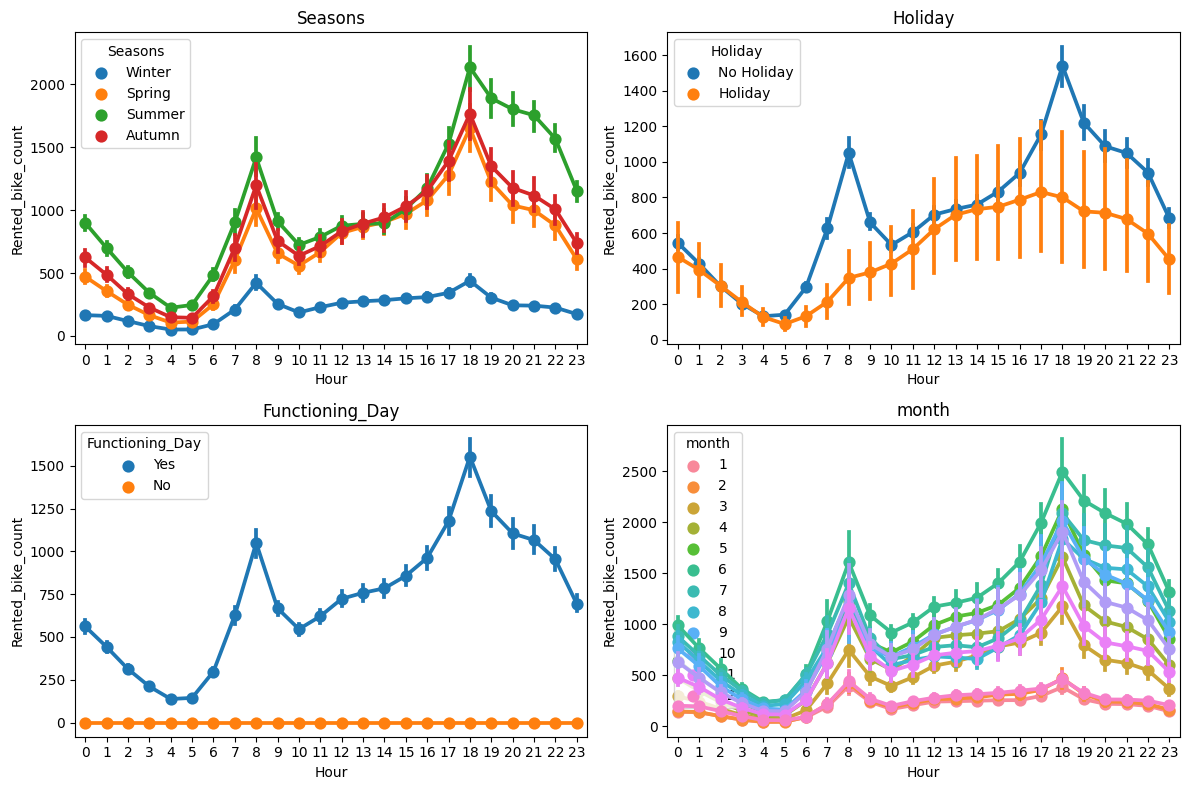

In [17]:
#Visualizing count plot for Hour

plt.figure(figsize=(12,8))
for n,col in enumerate(['Seasons','Holiday','Functioning_Day','month']):
 plt.subplot(2,2,n+1)
 plt.title(col)
 sns.pointplot(data=df,x='Hour',y='Rented_bike_count',hue=col)
 plt.tight_layout();

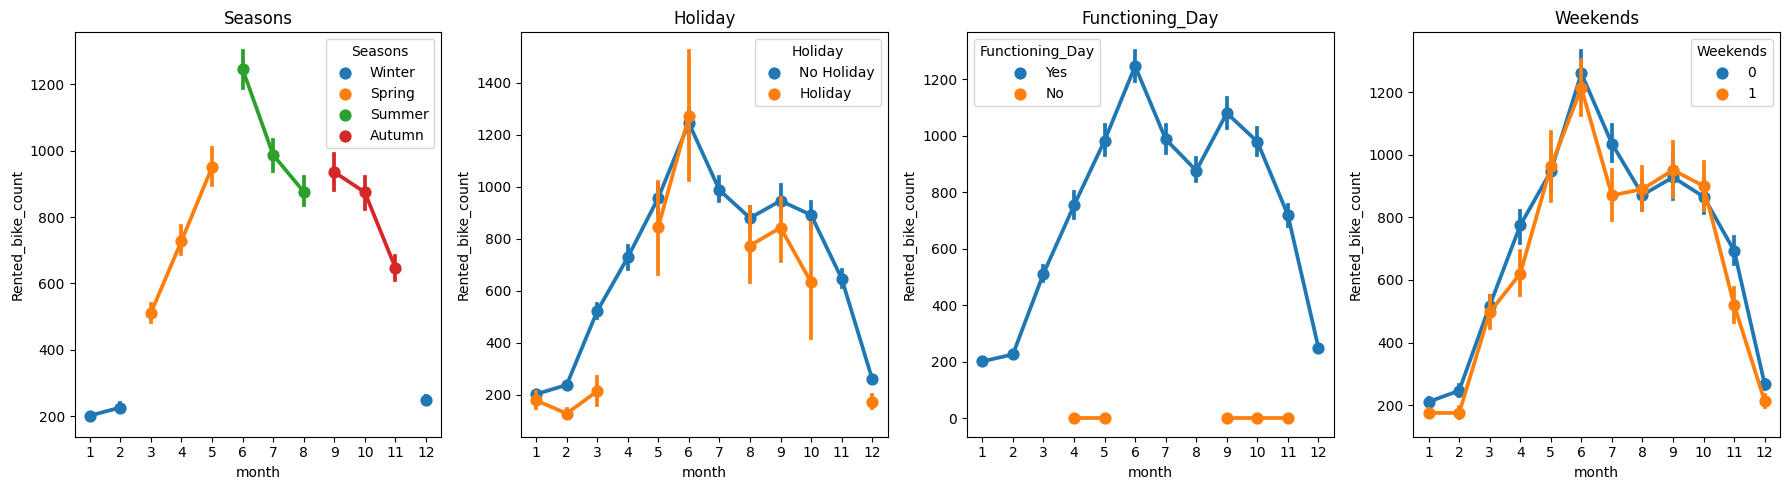

In [18]:

#Creating Count plot for month

plt.figure(figsize=(18,5))
for n,col in enumerate(['Seasons','Holiday','Functioning_Day','Weekends']):
 plt.subplot(1,4,n+1)
 plt.title(col)
 sns.pointplot(data=df,x='month',y='Rented_bike_count',hue=col)
 plt.tight_layout();

**Generally people use rentented bikes during working hours from 7am to 9 am and 5pm to 9pm**

**The demand of rented bike is high in May,June,August,September as compared to other months.**

**In the week days the demand of bikes are higher because of office.**

**on weekend days the demand of bikes are very low specially in morining hours but from 4pm to 8pm the demand is increased.**

**the people use bikes mostly on fuctioning day**

**Highest rented bikes in summer season(peak time:7am-9am and 5pm-9pm),lowest rented bikes in winter seasons ,highest rented bikes on holidays:in may and june month ,lowest rented bike on holidays:in December-January_February month**



**Analysis of Numerical data**

Numerical data is data types expressed in numbers rather than natural languages description.Sometimes called quatitative data ,numerical data is always collected in numbers from.It deffrentiate itself from other numbers from data types with its ability to carry out arithmatic operations.

In [19]:
#Getting Numerical features
num_col=['Temperature','Humidity','Wind_speed','Visibility (10m)','Dew_point','Solar_Radiation','Rainfall','Snowfall']

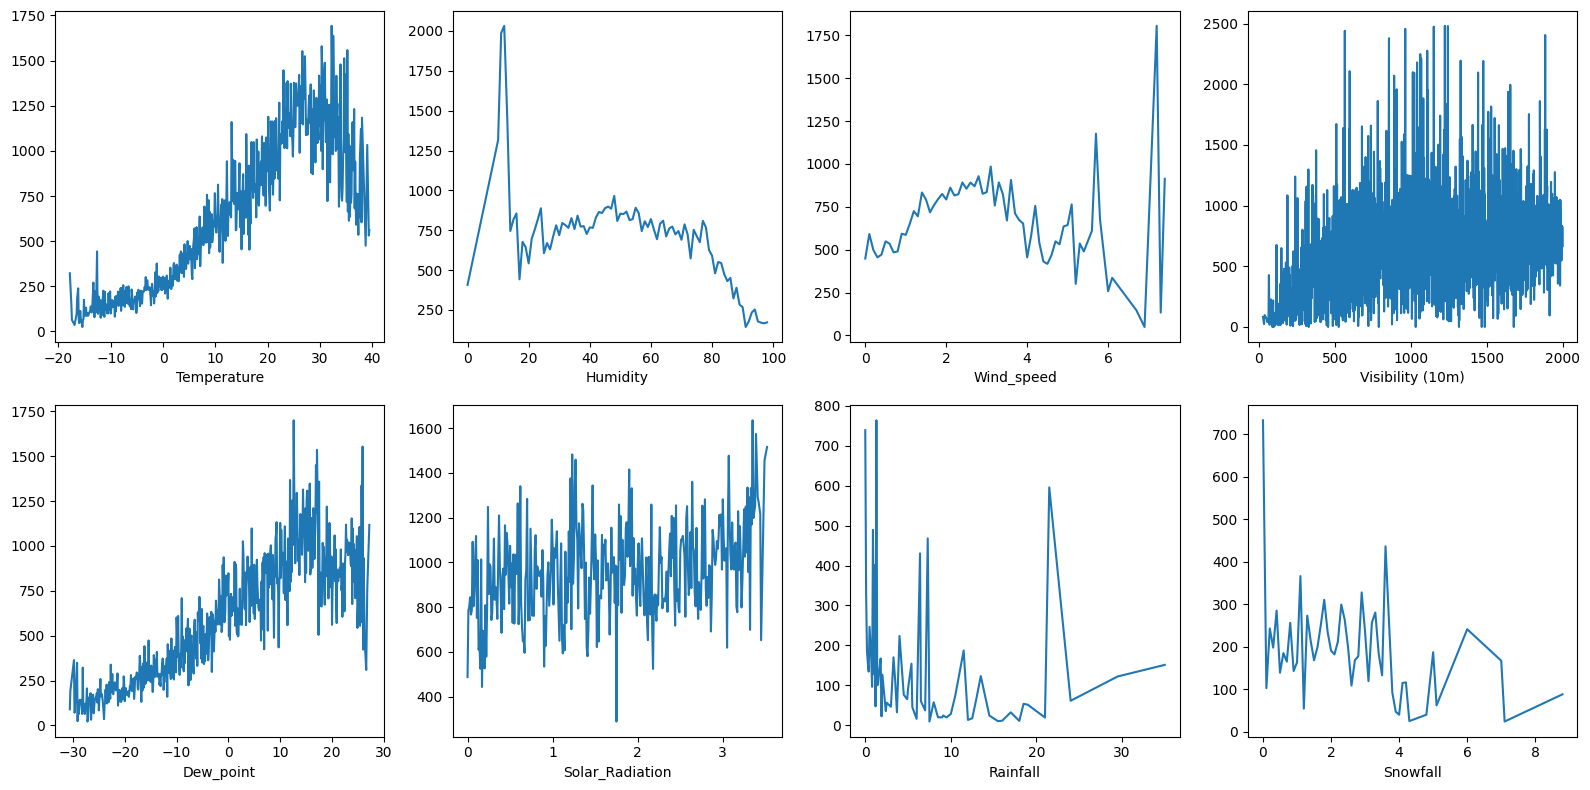

In [20]:
#Function for printting numerical features
plt.figure(figsize=(16,8))
for n,col in enumerate(num_col):
    plt.subplot(2,4,n+1)
    df.groupby(col).mean()['Rented_bike_count'].plot();
    plt.tight_layout();

**From the above graph we can see that people likes to ride bikes when it is pretty hot around 25 average.**

**We can see from above plots that the demand of rented bike is uniformly distributed dispite of wind speed but when the speed of wind is 7m/s then the demand of bikes also increases that means people love to ride bikes whn its little windy.**

**We also see that the amount of rented bike is huge when there is solar radiation.When there is increase in solar radiation there is also increase rented bikes**

**We see that when there is no rain ,rented bikes count is huge but when there is rain we can see bikes at certain points maybe it is when people are going to home from office on weekends.**

**We can see that ont the y-axis the amount of rented bike count is very low when we have more than 4cm of snow,the bike rent is much lower.**







###Regression plot

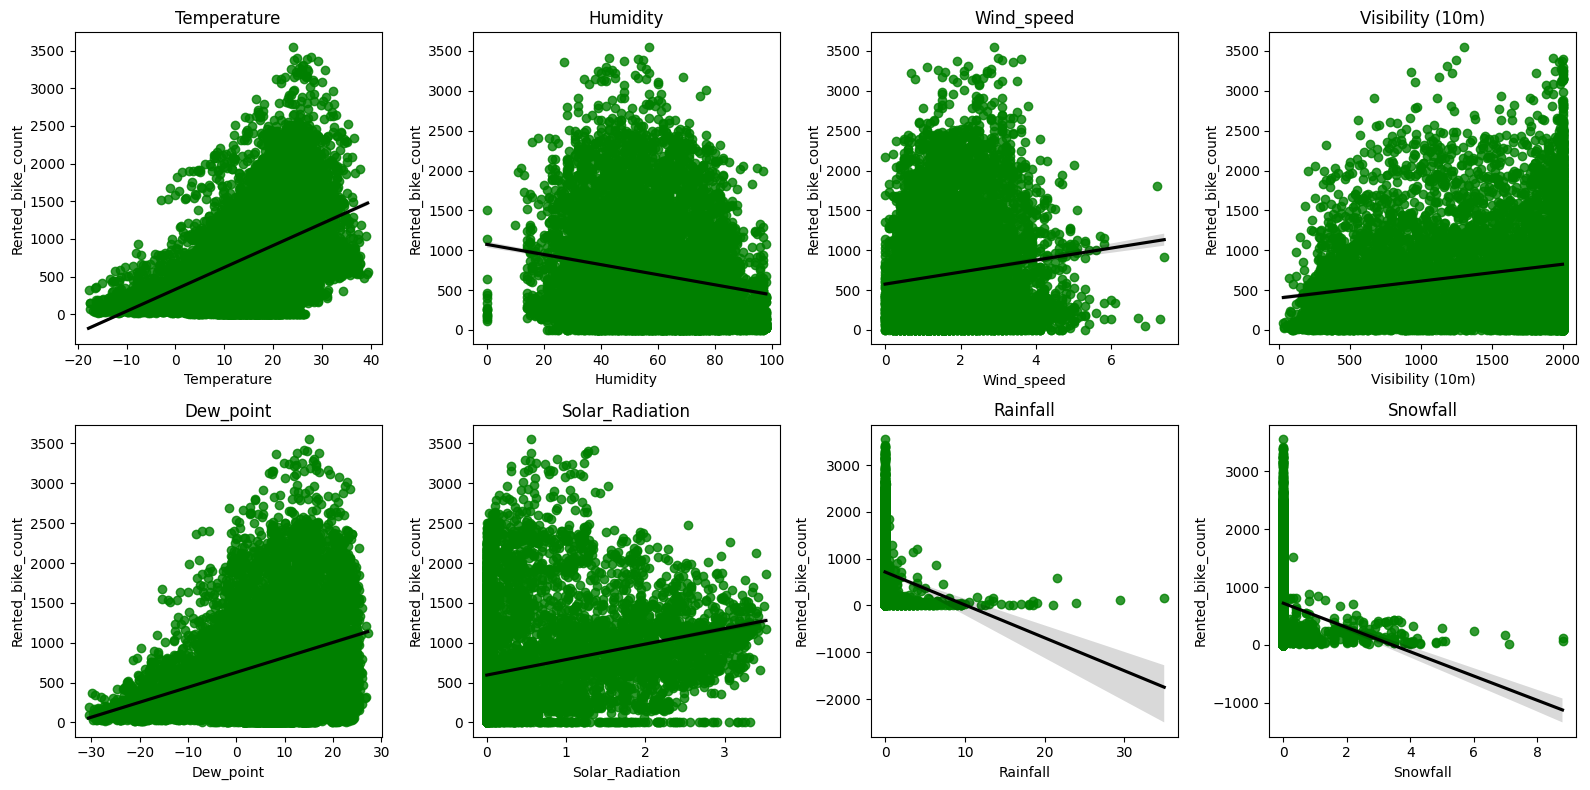

In [21]:
#Regression plot for numerical  features
plt.figure(figsize=(16,8))
for n,col in enumerate(num_col):
    plt.subplot(2,4,n+1)
    sns.regplot(x=df[col],y=df['Rented_bike_count'],scatter_kws={'color':'green'},line_kws={'color':'black'});
    plt.title(col)
    plt.tight_layout();





**From the above graph we can see that columns Tempeture,Wind_speed,Solar radiation and snowfall are positively ralation to target variable.**

**Rainfall,Snowfall,Humidity these feature are negetively related to target variable.**

###Checking Skewness and Outliers

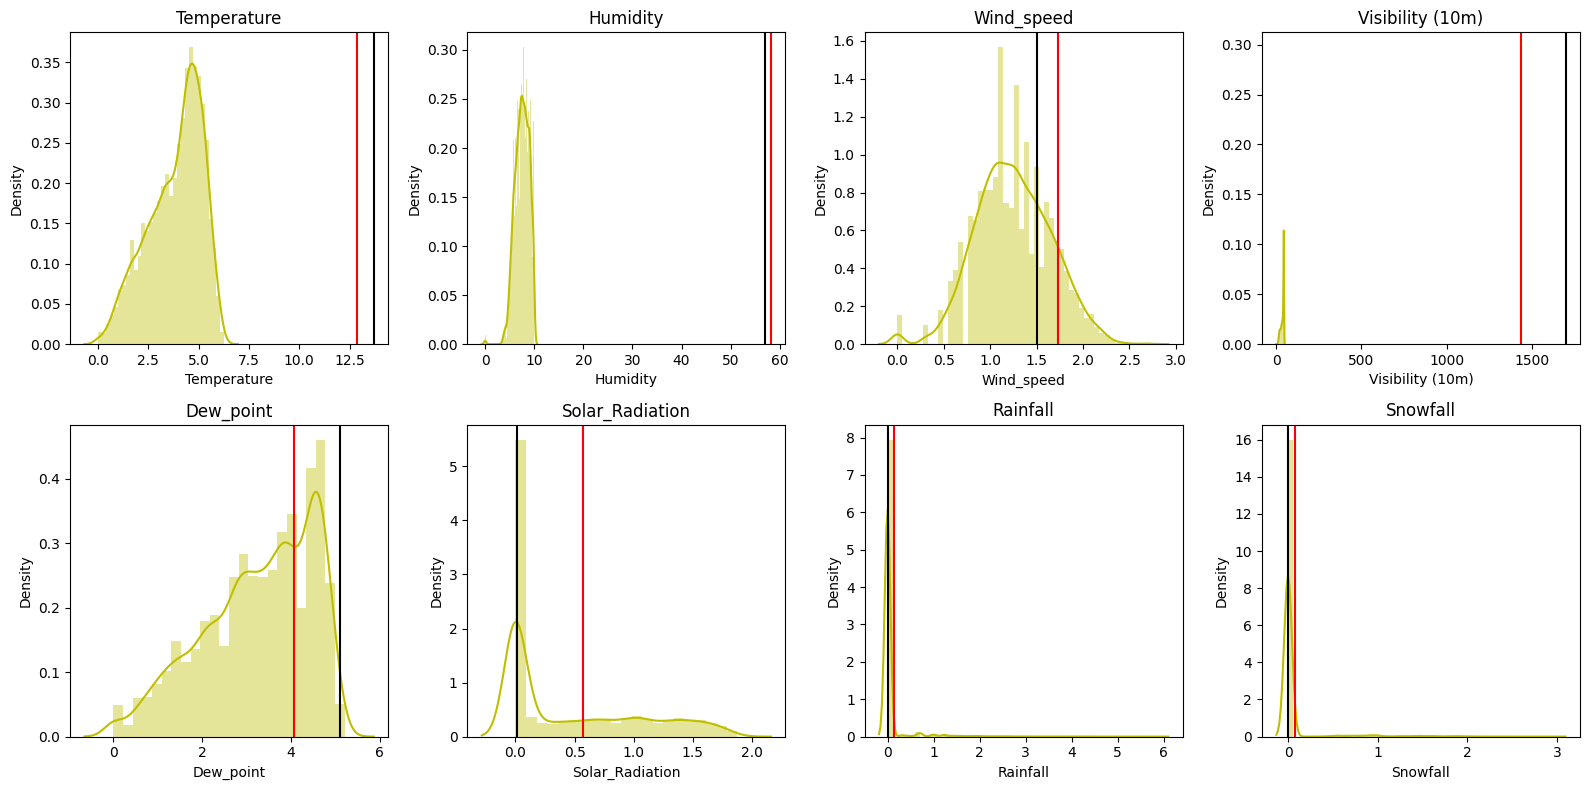

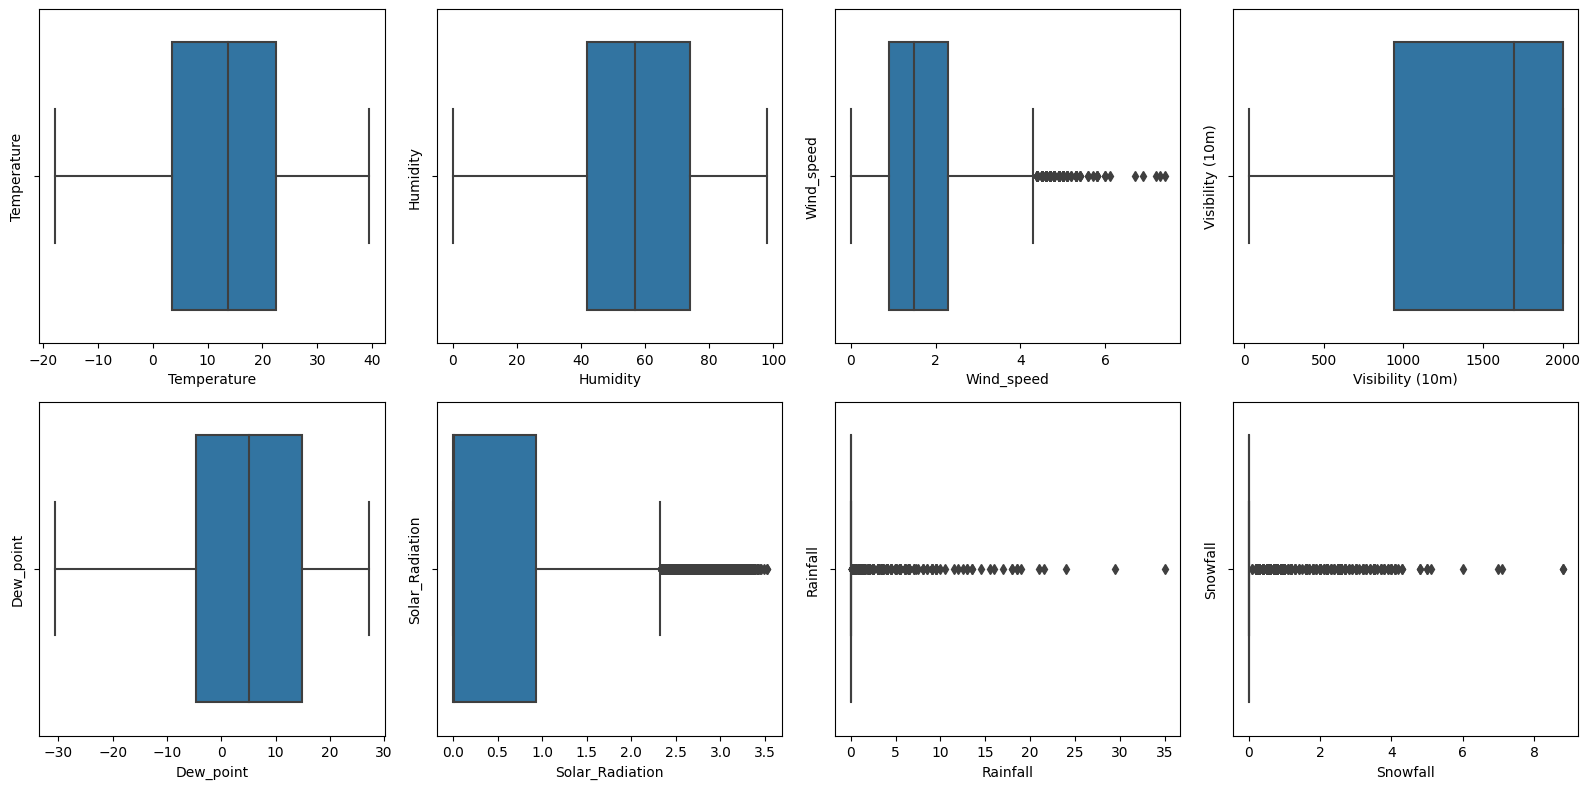

In [22]:
#checking distribution and boxplot fro numerical features
plt.figure(figsize=(16,8))
for n, col in enumerate(num_col):
    plt.subplot(2,4,n+1)
    plt.xlabel(col)
    plt.ylabel('Density')
    ax=sns.distplot(np.sqrt(df[col]),hist=True,color='y')
    ax.axvline((df[col]).mean(),color='red')
    ax.axvline((df[col]).median(),color='black')
    plt.title(col)
    plt.tight_layout();


plt.figure(figsize=(16,8))
for n,col in enumerate(num_col):
    plt.subplot(2,4,n+1)
    plt.ylabel(col)
    sns.boxplot(x=(df[col]))
    plt.tight_layout();





**From above graph we can see that Rented_bike_count visibility,solar_radiation,Rainfall,Snowfall all has highly skwed.So the assumption of linear regression is that 'the distribution of dependent and independent variable has to be normal.'**

**From boxplot we have noticed that outlier in Rented_bike_count,Snowfall,Rainfall,Solar_Radiation,Wind_speed columns.**

####Methods to treat Outliers :

**1.Trimming: In this technique we remove the outliers from dataset.So it is not good practice to follow.**

**2.Quantile based flooring and capping: In this technique the outlier is capped at a certain value above the 90th percentile value at a factor below the 10th percentile value**

**3.As the Mean value is highly influnced by the outliers it is advised to replace outliers with meadian value.**

In [23]:
#Handling skewedness in data
df['Rented_bike_count']=np.sqrt(df['Rented_bike_count'])
df['Snowfall']=np.cbrt(df['Snowfall'])
df['rainfall']=np.cbrt(df['Rainfall'])
df['Solar_Radiation']=np.cbrt(df['Solar_Radiation'])
df['Humidity']=np.sqrt(df['Humidity'])


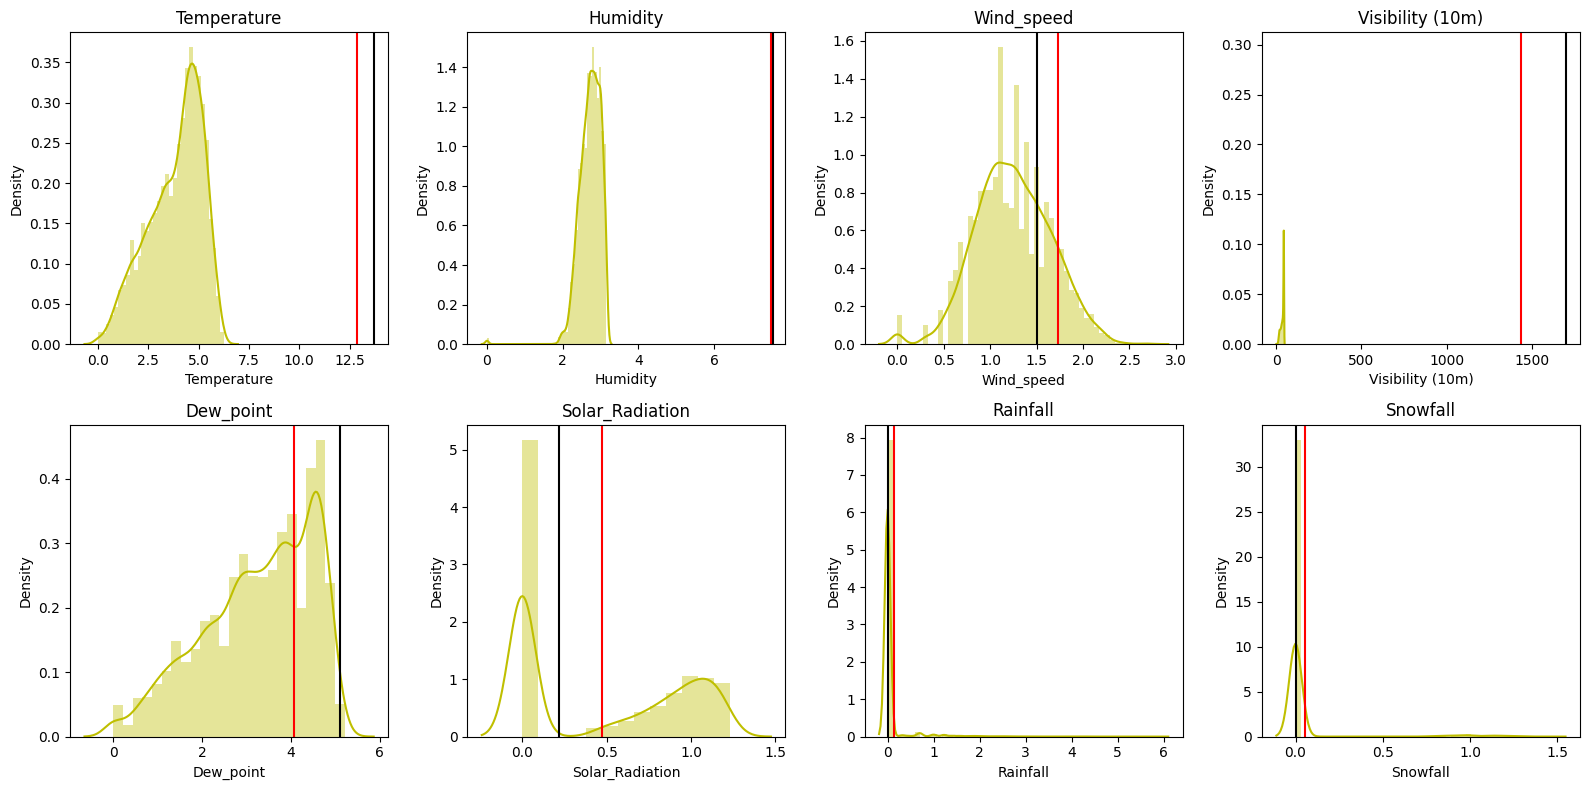

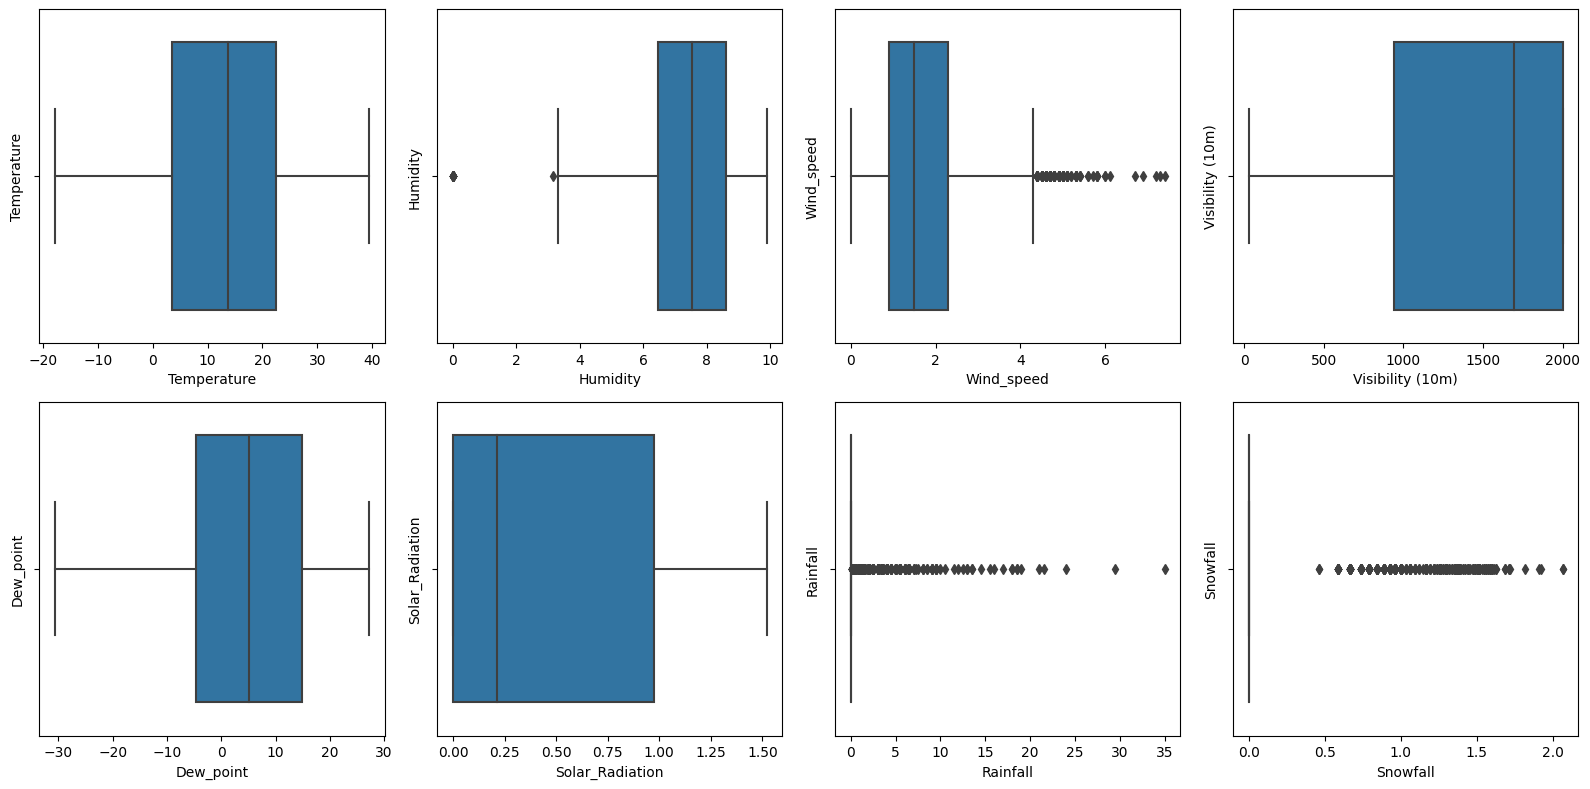

In [24]:
#checking distribution and box plot for categorical features

plt.figure(figsize=(16,8))
for n,col in enumerate(num_col):
    plt.subplot(2,4,n+1)
    plt.xlabel(col)
    plt.ylabel('Density')
    ax=sns.distplot(np.sqrt(df[col]),hist=True,color='y')
    ax.axvline((df[col]).mean(),color='red')
    ax.axvline((df[col]).median(),color='black')
    plt.title(col)
    plt.tight_layout();

plt.figure(figsize=(16,8))
for n,col,in enumerate(num_col):
    plt.subplot(2,4,n+1)
    plt.ylabel(col)
    sns.boxplot(x=(df[col]))
    plt.tight_layout();

**So we have rule of applying the Square root for the skewed variable in order to make it normal.After applying square root to skewed data here we got normal distribution.**

**After applying square root to Rented_bike_count we find that there is no outlier present.**

## **Feature Selection**

###Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

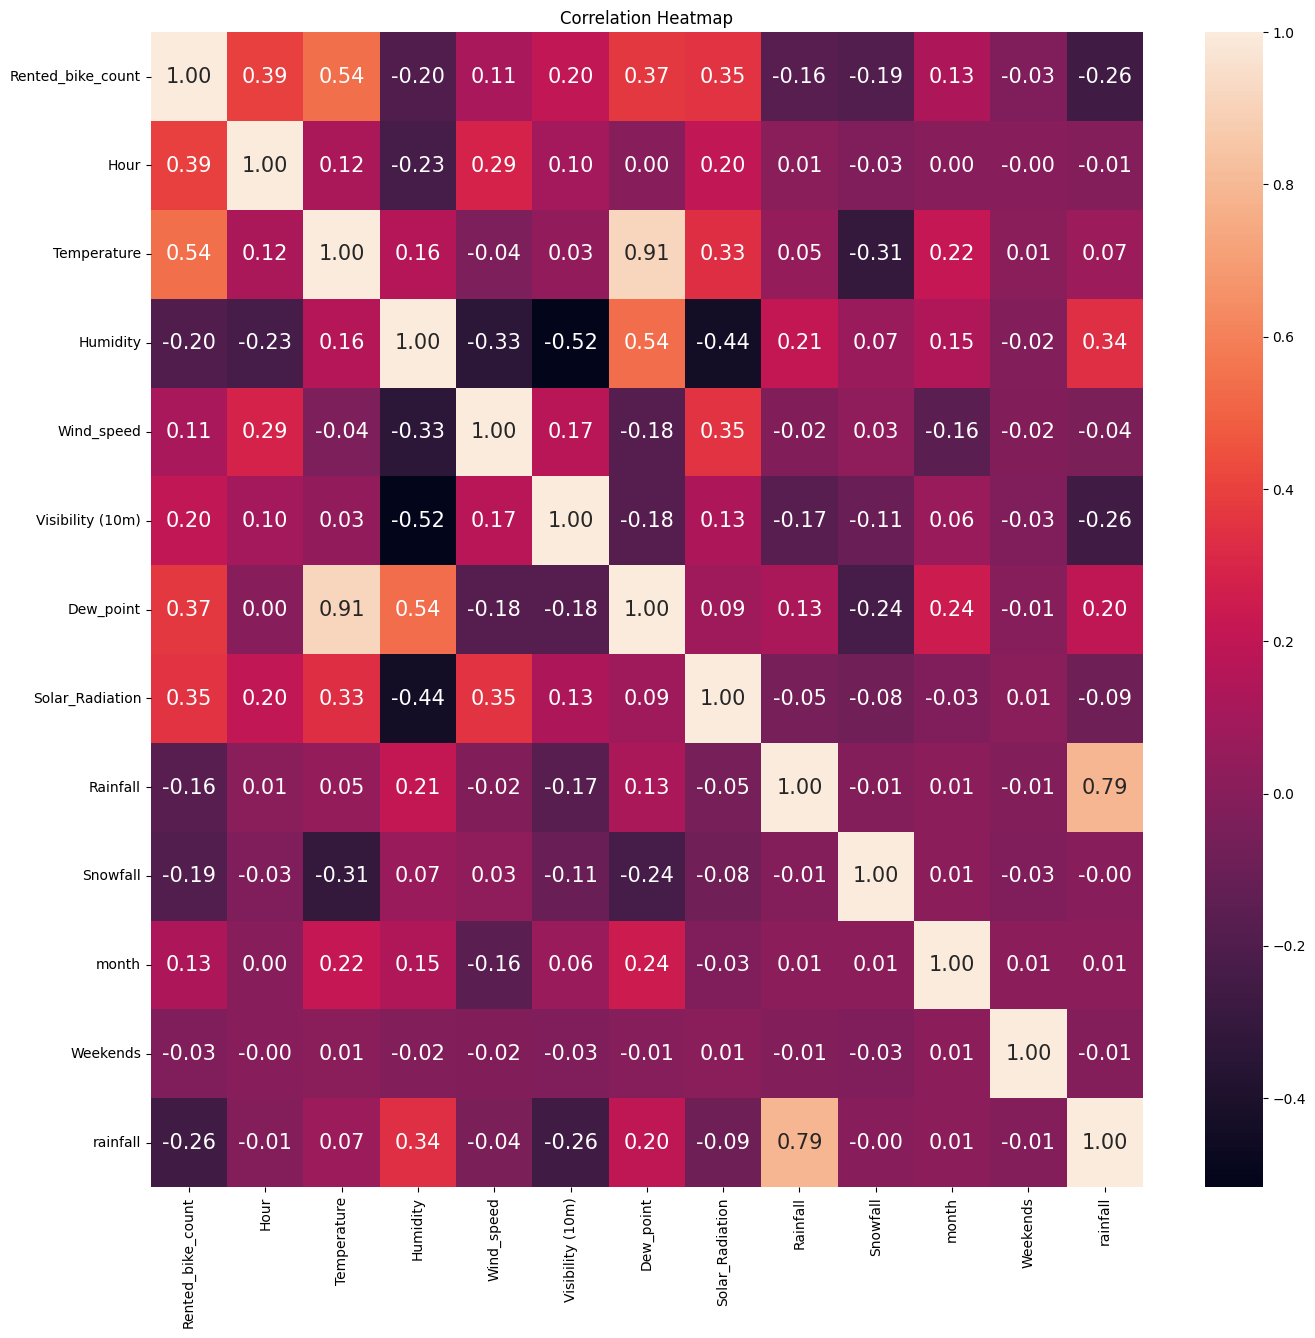

In [25]:
plt.figure(figsize=(16,15))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={'size':15})
plt.title('Correlation Heatmap')


**We can observed on the heatmap that the target variable line the most positively correlated variable to the bike rent are:**

Temperature

Dew_point

Solar_Radiation

Hour

**And most negetively correleted variables are:**

Humidity

Rainfall

Weekends

from above map we can noticed that thare is high correlation between Dew_point and Temperature.Here we are featuring the best suitable model so we have to  drop feature.


###Checking Multicollinearity

In [26]:
#Using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

#Checking VIF
VIF_table=cal(df[[i for i in df.describe().columns if i not in ['Rented_bike_count']]])
VIF_table



,variables,VIF
0,Hour,4.368604
1,Temperature,32.170950
2,Humidity,9.742653
3,Wind_speed,4.937706
4,Visibility (10m),9.606589
5,Dew_point,15.943496
6,Solar_Radiation,3.386841
7,Rainfall,2.751053
8,Snowfall,1.205622
9,month,5.098039


In [27]:
#Dropping Dew_point column which has high VIF
df=df.drop(['Dew_point'],axis=1)

#checking VIF
VIF_table=cal(df[[i for i in df.describe().columns if i not in ['Rented_bike_count']]])
VIF_table

,variables,VIF
0,Hour,4.055813
1,Temperature,3.176031
2,Humidity,9.337769
3,Wind_speed,4.778989
4,Visibility (10m),5.964580
5,Solar_Radiation,2.581737
6,Rainfall,2.744286
7,Snowfall,1.201866
8,month,5.085725
9,Weekends,1.389261


In [28]:
#dropping Humidity column which has high VIF
df=df.drop(['Humidity'],axis=1)


In [29]:
#Dropping Humidity and Dew_point from numeriacl features
num_col.remove('Dew_point')
num_col.remove('Humidity')

In [30]:
#checking VIF
VIF_table=cal(df[[i for i in df.describe().columns if i not in ['Rented_bike_count']]])
VIF_table

,variables,VIF
0,Hour,3.943052
1,Temperature,2.895063
2,Wind_speed,4.429083
3,Visibility (10m),5.356123
4,Solar_Radiation,2.443562
5,Rainfall,2.722144
6,Snowfall,1.157026
7,month,4.069266
8,Weekends,1.354423
9,rainfall,2.892422


Since VIF of all variables is less than 5, we can go with remaining variables

In [31]:
#Description of object value
df.describe(include='O').T

,count,unique,top,freq
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning_Day,8760,2,Yes,8465


**Here we can see that highest rented bikes are during Spring season**

**Highest rented bikes are when there is no holidays and fuctioning day**

## **Data Preprocessing**

A dataset may contain various type of values ,sometimes it consists of categorical values ,So to use those categorical values for programimng efficiency we create dummy variables.

**One Hot Encoding:-**

In [32]:
#getting Categorical features
cat_col

#using One Hot Encoding
df1=pd.get_dummies(df,columns=['Hour','Seasons','month','Holiday','Functioning_Day','Weekends'],drop_first=True)
df1.head()

,Rented_bike_count,Temperature,Wind_speed,Visibility (10m),Solar_Radiation,Rainfall,Snowfall,rainfall,Hour_1,Hour_2,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Holiday_No Holiday,Functioning_Day_Yes,Weekends_1
0,15.937377,-5.2,2.2,2000,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,14.282857,-5.5,0.8,2000,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,13.152946,-6.0,1.0,2000,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,1,1,0
3,10.344080,-6.2,0.9,2000,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,8.831761,-6.0,2.3,2000,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0


## ***7. ML Model Implementation***

###Train Test Split

Before fitting any model it is rule of thumb to split the dataset into train and test set.this means some proportion of data will go into training and some will used to evaluate how our model is performing on any unseen data. the Proportion may vary from 60:40,70:30,75:25 on the person but mostly used is 80:20 .in this step we will split the data into train and test using scikit learn library.

In [33]:
#Assing the value of x and y
x=df1.drop(['Rented_bike_count'],axis=1)
y=np.sqrt(df1['Rented_bike_count'])
y

0       3.992165
1       3.779267
2       3.626699
3       3.216221
4       2.971828
          ...   
8755    5.627626
8756    5.257428
8757    5.132629
8758    5.165591
8759    4.915902
Name: Rented_bike_count, Length: 8760, dtype: float64

In [34]:
#name of features
x_columns=x.columns
x_columns

Index(['Temperature', 'Wind_speed', 'Visibility (10m)', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'rainfall', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'Holiday_No Holiday', 'Functioning_Day_Yes', 'Weekends_1'],
      dtype='object')

In [35]:
x.head()

,Temperature,Wind_speed,Visibility (10m),Solar_Radiation,Rainfall,Snowfall,rainfall,Hour_1,Hour_2,Hour_3,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Holiday_No Holiday,Functioning_Day_Yes,Weekends_1
0,-5.2,2.2,2000,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,-5.5,0.8,2000,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
2,-6.0,1.0,2000,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
3,-6.2,0.9,2000,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
4,-6.0,2.3,2000,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [36]:
y.head()

0    3.992165
1    3.779267
2    3.626699
3    3.216221
4    2.971828
Name: Rented_bike_count, dtype: float64

###Standarizing the features

In [37]:
#Create the test and train data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)

(7008, 47)


In [38]:
#Standarizing the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [39]:
x_train=pd.DataFrame(x_train,columns=x_columns)
x_test=pd.DataFrame(x_test,columns=x_columns)
print(x_train.head())

   Temperature  Wind_speed  Visibility (10m)  Solar_Radiation  Rainfall  \
0     0.022370    2.092940         -1.176113         1.015184 -0.134019   
1     0.838222   -0.029683         -1.472667         0.830598 -0.134019   
2    -0.145847   -0.319131         -0.930350        -0.900267 -0.134019   
3    -1.306543    0.259766         -0.004643        -0.900267 -0.134019   
4     1.199888   -0.222648         -0.707525        -0.900267 -0.134019   

   Snowfall  rainfall    Hour_1    Hour_2    Hour_3  ...   month_6   month_7  \
0 -0.222239 -0.232467 -0.208514 -0.208887 -0.207394  ... -0.298403 -0.303478   
1 -0.222239 -0.232467 -0.208514 -0.208887 -0.207394  ...  3.351174 -0.303478   
2 -0.222239 -0.232467 -0.208514 -0.208887 -0.207394  ... -0.298403 -0.303478   
3 -0.222239 -0.232467 -0.208514 -0.208887 -0.207394  ... -0.298403 -0.303478   
4 -0.222239 -0.232467 -0.208514 -0.208887 -0.207394  ... -0.298403  3.295128   

    month_8   month_9  month_10  month_11  month_12  Holiday_No Holi

####Function for feature importance

In [40]:
def feature_importance(model):
 try:
   importance=model.feature_importance_
   feature=x_columns
 except:
   importance=np.abs(model.coef_)
   feature=x_columns
 indices=np.argsort(importance)
 indices=indices[20::-1]


 plt.figure(figsize=(12,4))
 plt.barh(range(len(indices)),importance[indices])
 plt.yticks(range(len(indices)),[feature[i] for i in indices])
 plt.title('Feature Importance')
 plt.show()

###Function for Score Metric

In [41]:
def metric_values(model,x_train,y_train,x_test,y_test):
 y_pred_train=model.predict(x_train)
 y_pred_test=model.predict(x_test)

 #Calculating MSE
 MSE=mean_squared_error(y_train,y_pred_train)
 #Calculating RMSE
 RMSE=np.sqrt(MSE)
 #Calculating MAE
 MAE=mean_absolute_error(y_train,y_pred_train)
 #Calculate R2 and adjusted R2
 r2=r2_score(y_train,y_pred_train)
 Adjusted_r2=1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
#Creating table for values
 data_set=[['MAE',round((MAE),3)],['MSE',round((MSE),3)],['RMSE',round((RMSE),3)],['R2_score',round((r2),3)],['Adjusted R2',round((Adjusted_r2),3)]]
 train_df=pd.DataFrame(data_set,columns=['metrics','train_values'])

 #Calculating the metric values for testing data
 MSE=mean_squared_error(y_test,y_pred_test)
#Calculating RMSE
 RMSE=np.sqrt(MSE)
#Calculating MAE
 MAE=mean_absolute_error(y_test,y_pred_test)
#Calculate R2 and adjusted R2
 r2=r2_score(y_test,y_pred_test)
 Adjusted_r2=1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
#Creating table for values
 data_set=[['MAE',round((MAE),3)],['MSE',round((MSE),3)],['RMSE',round((RMSE),3)],['R2_score',round((r2),3)],['Adjusted R2',round((Adjusted_r2),3)]]
 test_df=pd.DataFrame(data_set,columns=['metrics','test_values'])

 metric_values=train_df.merge(test_df,how='inner',on='metrics')
 print(metric_values)

 plt.figure(figsize=(4,4))
 ax=metric_values.plot(kind='bar',x='metrics',rot=0)
 plt.title(model)
 ax.legend(bbox_to_anchor=(1.05,1),loc='upper left')
 plt.show();

 #Hetroscadacity
 residuals=y_test-y_pred_test
 plt.figure(figsize=(9,3))
 plt.subplot(1,2,1)
 plt.xlabel('residuals')
 sns.distplot(residuals);

 #Plotting the scatterplot
 plt.subplot(1,2,2)
 plt.xlabel('scatterplot of residuals')
 plt.scatter(y_pred_test,residuals)
 plt.tight_layout();

 plt.figure(figsize=(12,3))
 plt.plot((y_pred_test)[:100])
 plt.plot((np.array(y_test)[:100]))
 plt.legend(['Predited','Actual'])
 plt.title('Actual and predicted bike count')
 plt.show();

 try:
  if model== xgb_model:
   result=pd.DataFrame()
   model=[Linear_Regression,ridge_regression,model,rf_model,gradient_boosting_regressor,xgb_model]
   for i in model:
    result=redult.append(metric_values[i],ignore_index=True)
   print(result)
 except:
  pass

### Linear Regression

       metrics  train_values  test_values
0          MAE         0.410        0.398
1          MSE         0.310        0.293
2         RMSE         0.557        0.541
3     R2_score         0.863        0.868
4  Adjusted R2         0.860        0.864


<Figure size 400x400 with 0 Axes>

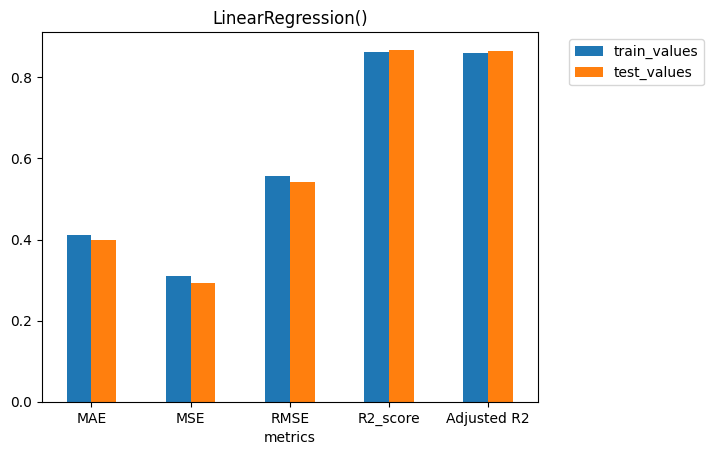

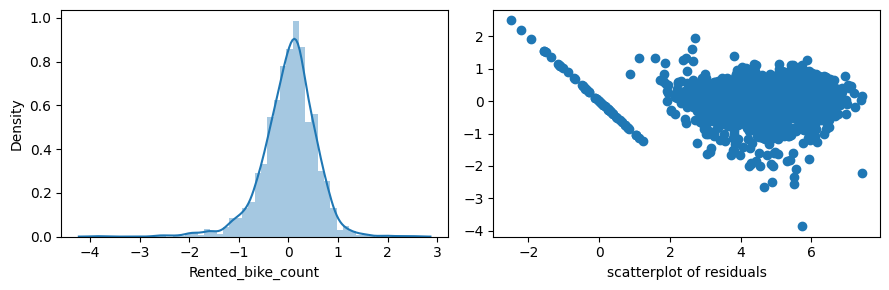

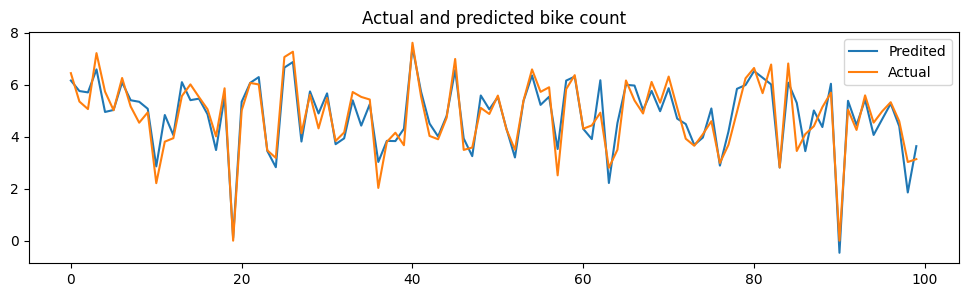

In [42]:
# ML Model - 1 Implementation
#fitting model to the training Dataset
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)

reg.score(x_train,y_train)
reg.intercept_

reg.coef_

#Predicting the model
metric_values(reg,x_train,y_train,x_test,y_test)

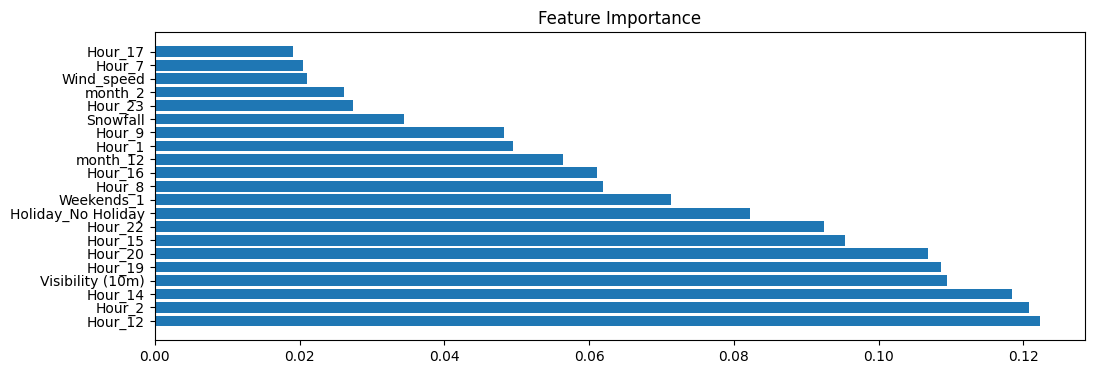

In [43]:
#Feature importance
feature_importance(reg)

**simple Linear regression Model**

**R2 score of train data: 0.863**

**adjusted R2 score of train data: 0.860**

**R2 score of test data: 0.868**

**adjusted R2 score of test data: 0.864**

**Performance of data: Better**

**Feature Impotance: weekends,holiday_Noholiday,hour:6,13,14,12,20,19,22,15**

###Ridge Regression

       metrics  train_values  test_values
0          MAE         0.410        0.398
1          MSE         0.310        0.293
2         RMSE         0.557        0.541
3     R2_score         0.863        0.868
4  Adjusted R2         0.860        0.864


<Figure size 400x400 with 0 Axes>

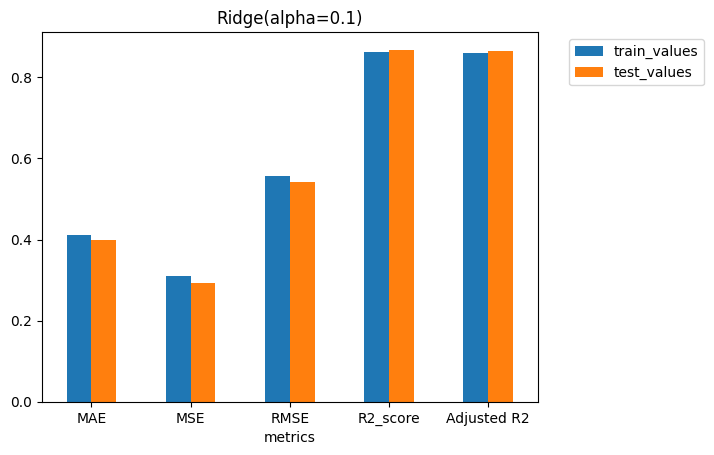

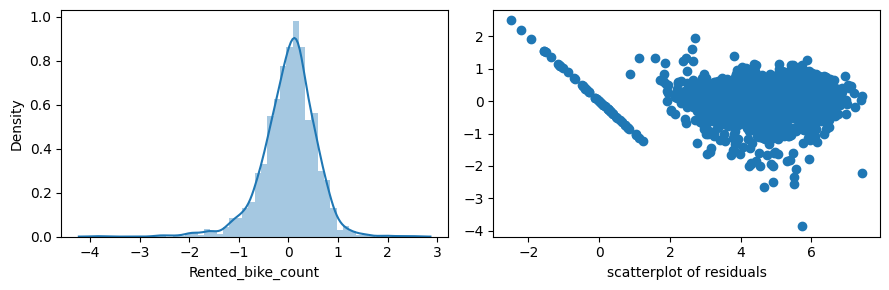

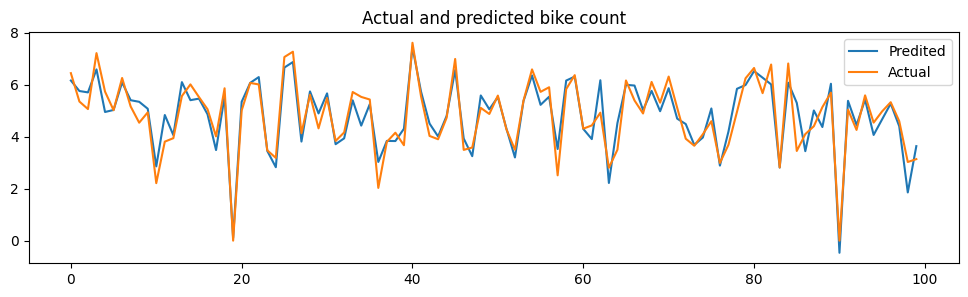

In [44]:
#Import the packege
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

#Getting metric score
metric_values(ridge,x_train,y_train,x_test,y_test)

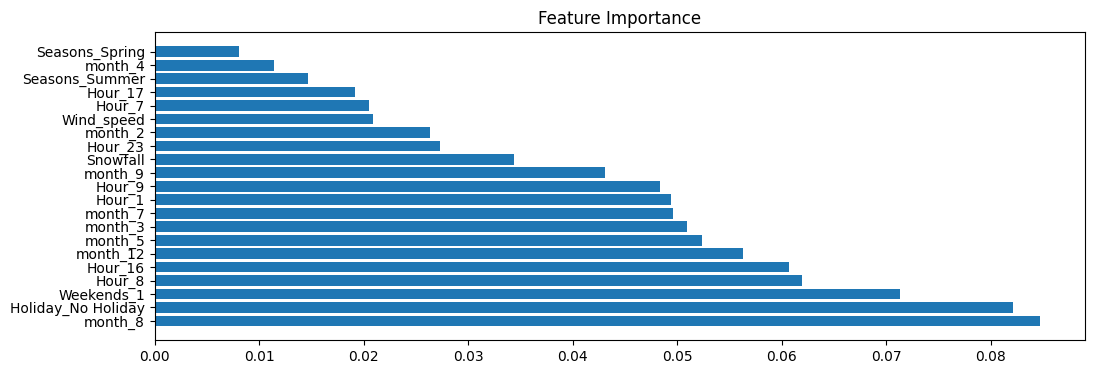

In [45]:

#Feature importance
feature_importance(ridge)

**Ridge Regression Model**

**R2 score of train data: 0.863**

**adjusted R2 score of train data: 0.860**

**R2 score of test data: 0.868**

**adjusted R2 score of test data: 0.864**

**Performance of data: Better**

**Feature Importance: weekends,holiday_Noholiday,hour:1,16,9, month:3,5,12,9,8**

###Decision Tree with GridSearchCV

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(random_state=0)
dt_params={'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

gs_dt=GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(x_train,y_train)
a=gs_dt.best_params_

       metrics  train_values  test_values
0          MAE         0.261        0.323
1          MSE         0.158        0.239
2         RMSE         0.397        0.489
3     R2_score         0.930        0.892
4  Adjusted R2         0.929        0.889


<Figure size 400x400 with 0 Axes>

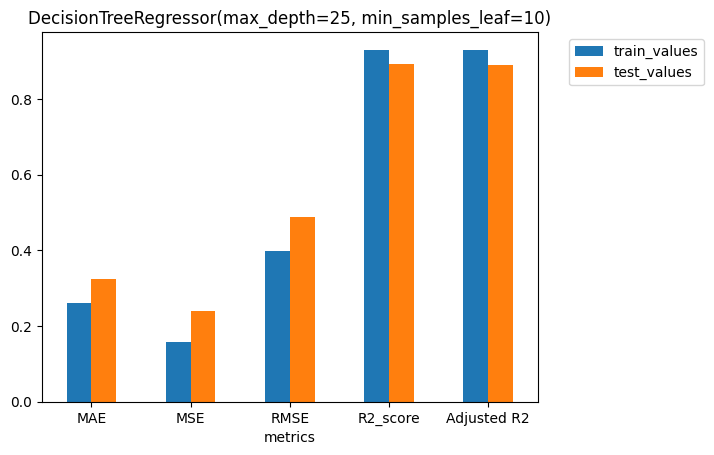

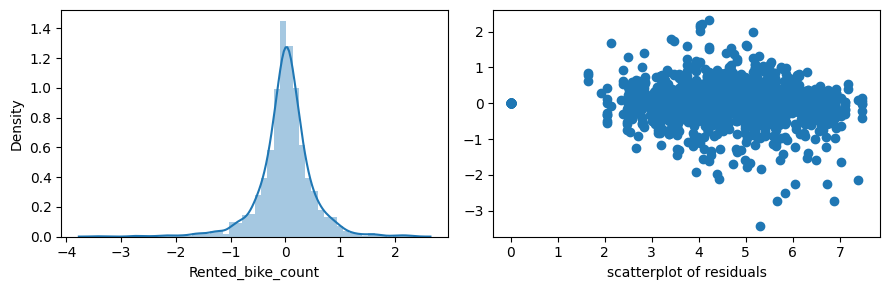

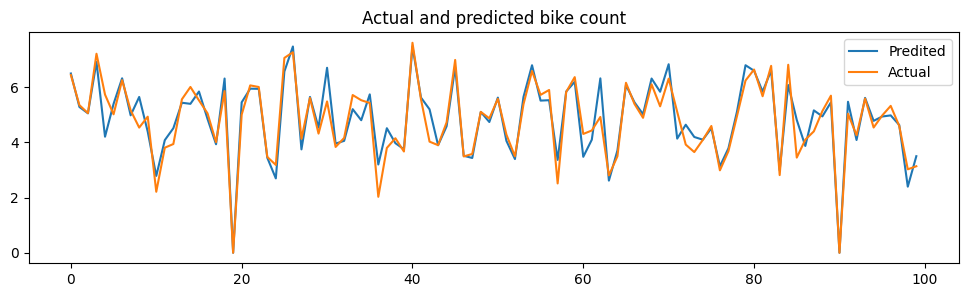

In [47]:
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf=a['min_samples_leaf'])
model=dtr.fit(x_train,y_train)

#Getting metric score
metric_values(model,x_train,y_train,x_test,y_test)

**Decision Tree with grid Search CV Model**

**R2 score of train data: 0.930**

**adjusted R2 score of train data: 0.929**

**R2 score of test data: 0.892**

**adjusted R2 score of test data: 0.889**

**Performance of data: Better**

### Random Forest

       metrics  train_values  test_values
0          MAE         0.092        0.241
1          MSE         0.023        0.156
2         RMSE         0.152        0.394
3     R2_score         0.990        0.930
4  Adjusted R2         0.990        0.928


<Figure size 400x400 with 0 Axes>

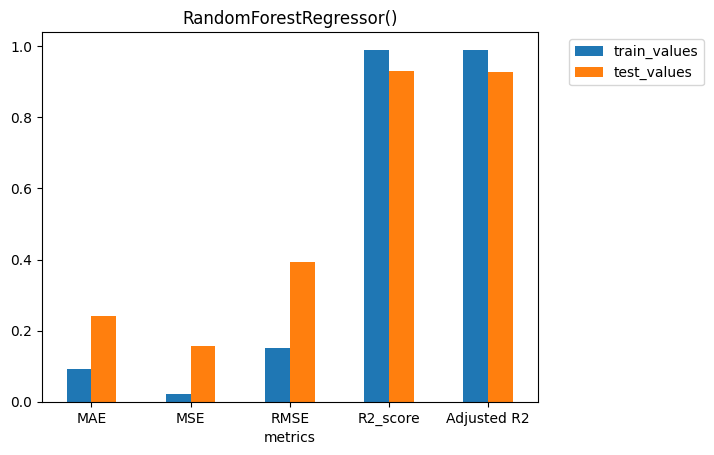

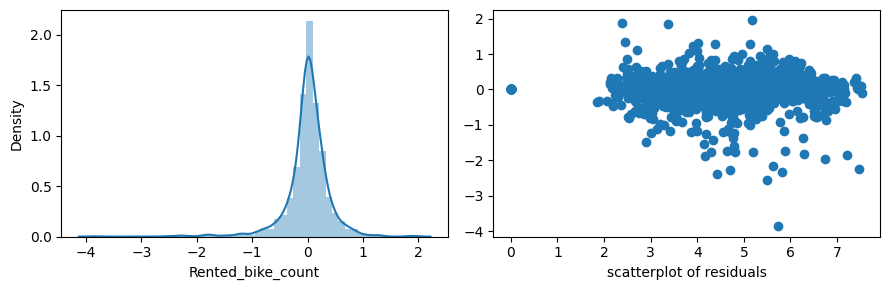

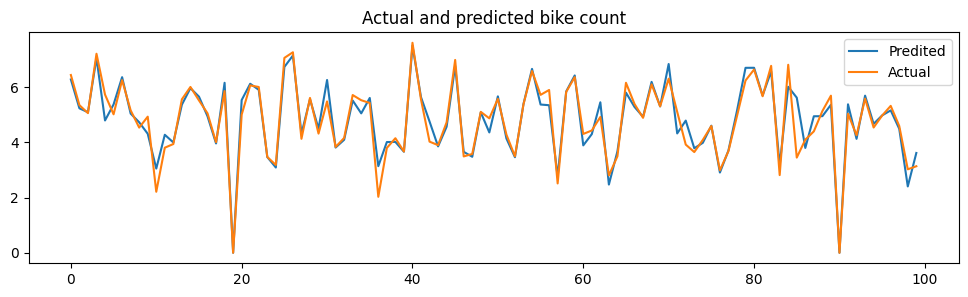

In [48]:
#fitting the Random Forest classifier to the training set
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()
clf.fit(x_train,y_train)

#predicting the test set result
metric_values(clf,x_train,y_train,x_test,y_test)

**Random Forest Model**

**R2 score of train data: 0.990**

**adjusted R2 score of train data: 0.989**

**R2 score of test data: 0.931**

**adjusted R2 score of test data: 0.929**

**Performance of data: Best**

### Lasso Regressor

       metrics  train_values  test_values
0          MAE         0.416        0.404
1          MSE         0.318        0.303
2         RMSE         0.564        0.551
3     R2_score         0.860        0.863
4  Adjusted R2         0.856        0.859


<Figure size 400x400 with 0 Axes>

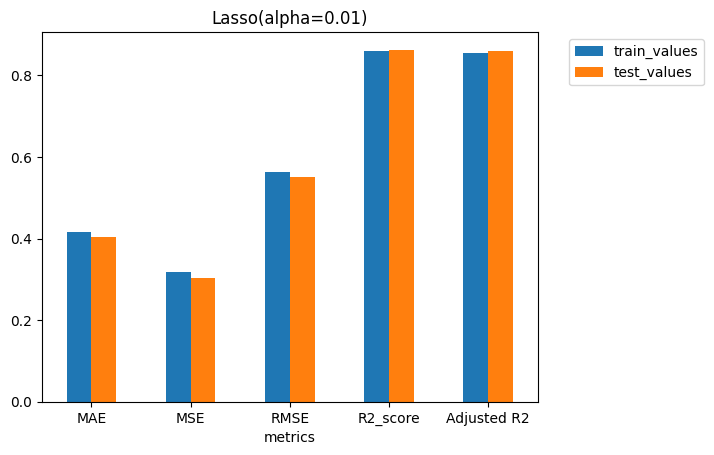

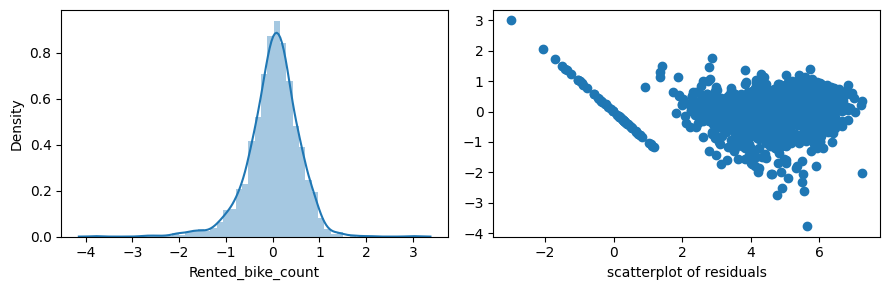

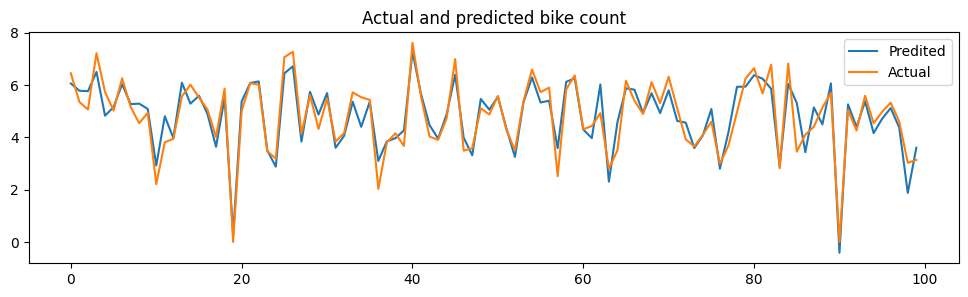

4.601521329535837

In [49]:
#Fitting Decision tree classifier to training dataset
from sklearn.linear_model import Lasso

#Fitting the model
L1 = Lasso(alpha=0.01,max_iter=1000)
L1.fit(x_train,y_train)

L1.score(x_train,y_train)

#Predicting the score
metric_values(L1,x_train,y_train,x_test,y_test)
L1.coef_

L1.intercept_

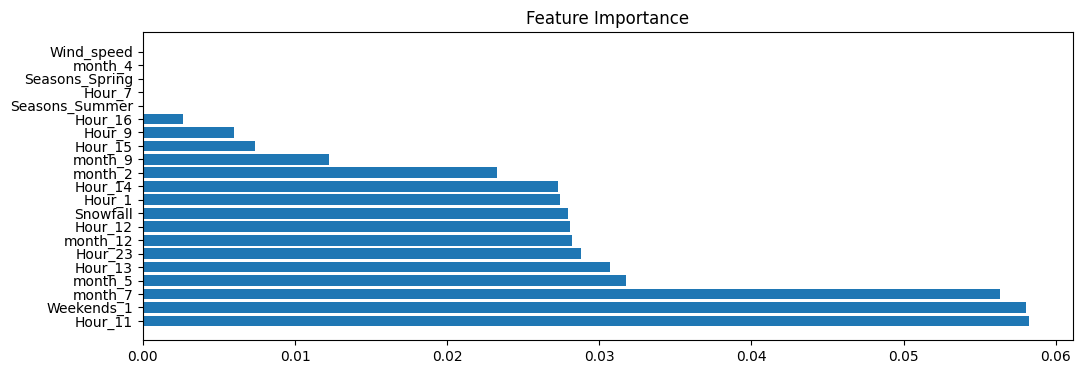

In [50]:

#Feature importance
feature_importance(L1)

**Lasso Regressor Model**

**R2 score of train data: 0.860**

**adjusted R2 score of test data: 0.856**

**R2 score of test data: 0.863**

**adjusted R2 score of test data: 0.859**

**Performance of data:Better**

###Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gradient=GradientBoostingRegressor()
gradient.fit(x_train,y_train)

GradientBoostingRegressor()

       metrics  train_values  test_values
0          MAE         0.360        0.376
1          MSE         0.240        0.259
2         RMSE         0.490        0.509
3     R2_score         0.894        0.883
4  Adjusted R2         0.891        0.880


<Figure size 400x400 with 0 Axes>

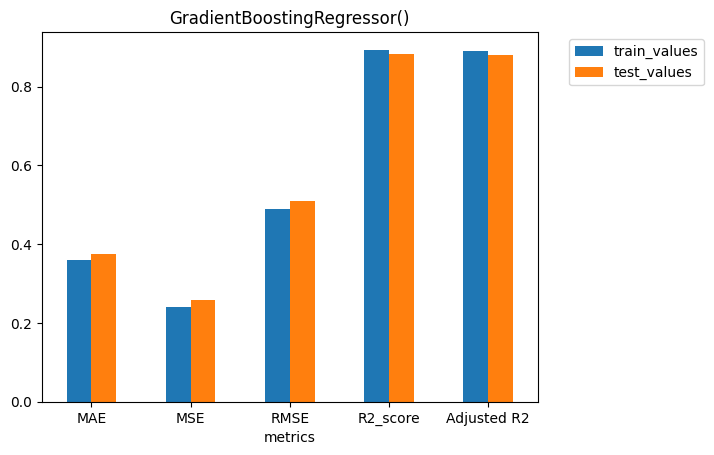

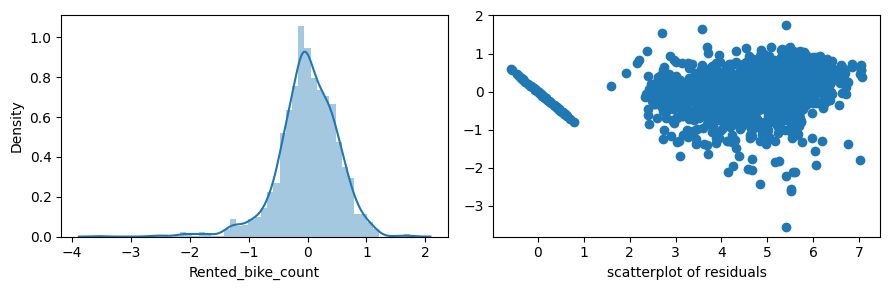

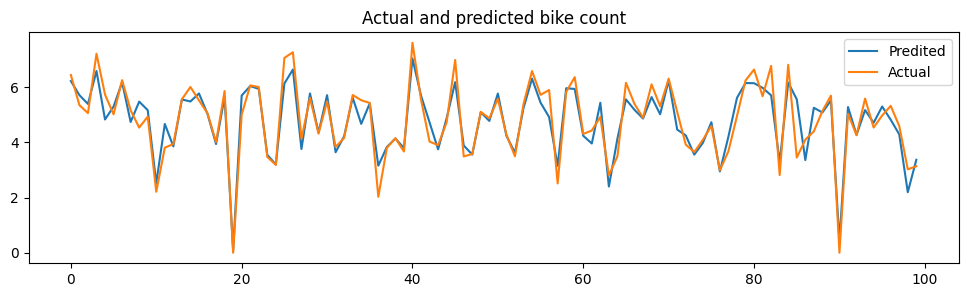

In [52]:
#Getting score metric
metric_values(gradient,x_train,y_train,x_test,y_test)

**Gradient Boosting Model**

**R2 score of train data: 0.894**

**adjusted R2 score of train data: 0.891**

**R2 score of test data: 0.883**

**adjusted R2 score of test data: 0.880**

**Performance of data: Better**

###XGBoost Regressor with GridSearchCV

The best value to be found out: {'colsample_bytree': 0.7, 'eval_metric': 'rmse', 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 1000, 'n_thread': 4, 'subsample': 0.5}
       metrics  train_values  test_values
0          MAE         0.306        0.323
1          MSE         0.188        0.210
2         RMSE         0.433        0.459
3     R2_score         0.917        0.905
4  Adjusted R2         0.915        0.903


<Figure size 400x400 with 0 Axes>

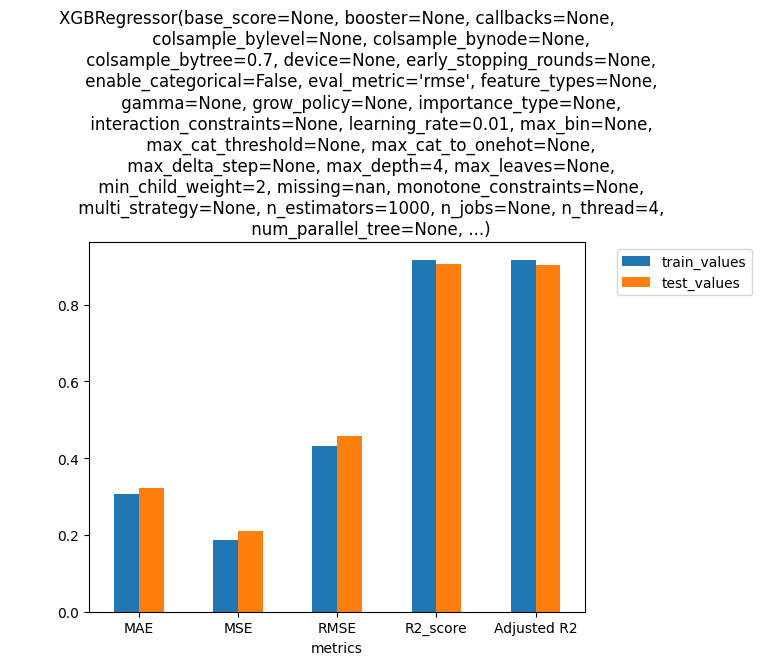

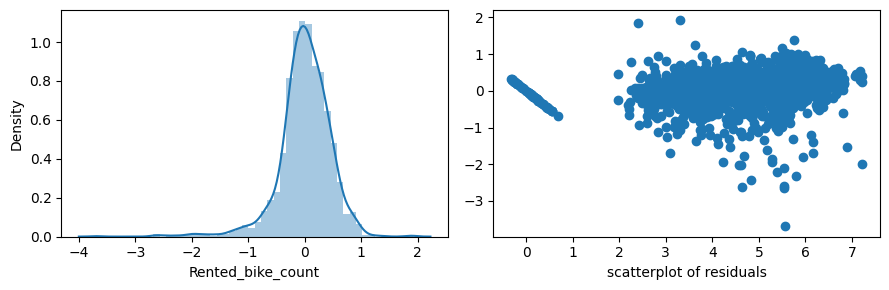

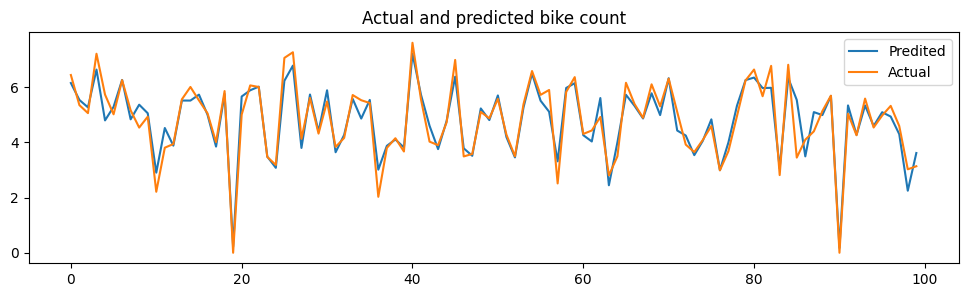

In [53]:
#Importing Gradient Boosting Regressor from sklearn.ensemble
from xgboost import XGBRegressor

#Parameter for gradient boosting Regressor

param= {'n_thread':[4],
           'n_estimators':[1000],  #600,400],
           'learning_rate':[0.01],  #,0.03,0.1],
           'min_child_weight':[2],   #4,8],
           'max_depth':[4],   #15,20],
           'subsample':[0.5],    #0.5,1],
           'eval_metric':['rmse'],
           'colsample_bytree':[0.7]

          }

xg=GridSearchCV(XGBRegressor(),param_grid=param,cv=5)

#Fitting the model
try:
 xg.fit(x_train,y_train)
except Exception as e:
 print(f"Error:{e}")

#Exception handling

#Printing Best parameter for model
print('The best value to be found out:', xg.best_params_)

#Predicting the model
best_model=xg.best_estimator_

#Getting metric score
metric_values(best_model,x_train,y_train,x_test,y_test)

**XG Boost with GridSearchCV Model**

**R2 score of train data: 0.917**

**adjusted R2 score of train data: 0.915**

**R2 score of test data: 0.905**

**adjusted R2 score of test data: 0.903**

**Performance of data: Better**

# **Model Score**

In [54]:
from prettytable import PrettyTable

#Specify the column name
myTable=PrettyTable(['Model_Name','R2 of train dataset','Adjusted R2 of train dataset','R2 of test dataset ','Adjusted R2 of test dataset'])

#adding rows
myTable.add_row(['Linear Regression','86%','86%','86%','86%'])
myTable.add_row(['Ridge Regression','86%','86%','86%','86%'])
myTable.add_row(['Decision tree with GridSearchCV','93%','92%','89%','88%'])
myTable.add_row(['Random Forest','99%','98%','93%','92%'])
myTable.add_row(['Lasso Regressor','86%','85%','86%','85%'])
myTable.add_row(['Gradient Boosting','89%','89%','88%','88%'])
myTable.add_row(['XG Boosting with GridSearchCV','91%','91%','90%','90%'])

print(myTable)

+---------------------------------+---------------------+------------------------------+---------------------+-----------------------------+
|            Model_Name           | R2 of train dataset | Adjusted R2 of train dataset | R2 of test dataset  | Adjusted R2 of test dataset |
+---------------------------------+---------------------+------------------------------+---------------------+-----------------------------+
|        Linear Regression        |         86%         |             86%              |         86%         |             86%             |
|         Ridge Regression        |         86%         |             86%              |         86%         |             86%             |
| Decision tree with GridSearchCV |         93%         |             92%              |         89%         |             88%             |
|          Random Forest          |         99%         |             98%              |         93%         |             92%             |
|         Las

# **Conclusion and Summary**

**- count of rented bike (dependent variable):positively skewed**

**- Normally distributed: Temperature,Humidity**

**- Positively skewed attributes: Wind,solar radiation,snowfall,Reainfall**

**- Negetivley Skewed attributes: Visibility**

**- positivley correleted variable with target variable: Temperature,Dew_point,solar radiation,Hour**

**- Negetivley correleted variables: Humidity,Rainfall,weekend**

**- The number of rented bikes is average higher during rush hours.**

**- The rented bikes count is higher during summer and lowes in winter.**

**- The count is higher on working days than on non-working days.**

**- The number of bikes on average remain constant on Monday-Saturday it dips on sunday.the count is lower on weekends than on weekdays.**

**- On regular days,the demand for the bikes is higher on rush hours.On holiday the demand is completely lower in the morning and higher in afternoon.**

**- Conclusion after using diffrent models:**

**- No overfitting is seen**
**- Random forest,XG Boost with gridserachcv,Decision tree with grid searchcv gives higher R2 score.**

**- Feature importance fro diffrent models are diffrent.**

**- Important features which affect the most: Functioning day,winter season,18th hour i.e. 6pm,Temperature,Humidity,weekends**

**- So this is not the ultimate end.As the data is time dependent ,the value of features like Temperature,windspeed,solar radiation will not be consistent.**



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***